# Binary classification based on Logistic Regression with a quadratic regularization

## import library

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load data

In [67]:
fname_data_train    = 'assignment_10_data_train.csv'
fname_data_test     = 'assignment_10_data_test.csv'

data_train  = np.genfromtxt(fname_data_train, delimiter=',')
data_test   = np.genfromtxt(fname_data_test, delimiter=',')

x_train = data_train[:,0]
y_train = data_train[:,1]
labels_train = data_train[:,2]

x_test = data_test[:,0]
y_test = data_test[:,1]
labels_test = data_test[:,2]

## plot the data

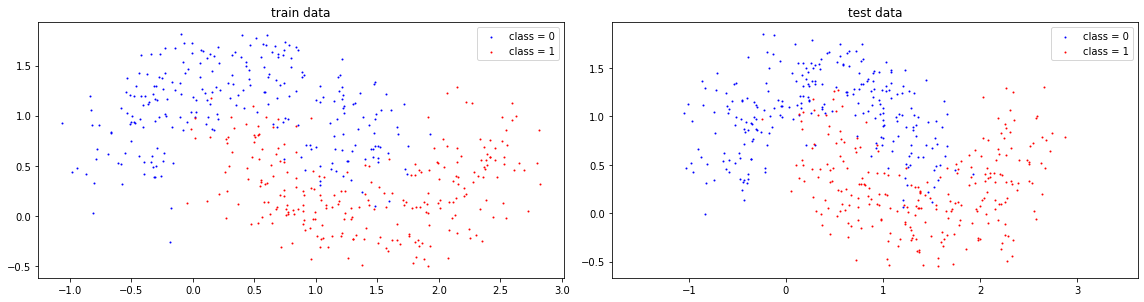

In [68]:
colors = ['blue', 'red']
label_text = {0 : 'class = 0', 1 : 'class = 1'}

plt.figure(figsize=(16,8))

# data 1
plt.subplot(221)
plt.title('train data')
for i, label in enumerate(labels_train.astype(int)):
    plt.scatter(x_train[i], y_train[i], c=colors[label], label=label_text[label], s=1.0)
    label_text[label] = "_nolegend_"

plt.legend(loc='upper right')

label_text = {0 : 'class = 0', 1 : 'class = 1'}

# data 2
plt.subplot(222)
plt.title('test data')
for i, label in enumerate(labels_test.astype(int)):
    plt.scatter(x_test[i], y_test[i], c=colors[label], label=label_text[label], s=1.0)
    label_text[label] = "_nolegend_"

plt.legend(loc='upper right')

plt.axis('equal')
plt.tight_layout()
plt.show()

## define feature function

In [69]:
def feature_function(x, y):
    
    feature = x@y

    return feature

## define regression function based on the feature function

In [92]:
def regression_function(theta, feature):

    value = theta*feature
    
    return value

## define regularization function on the model parameters

In [111]:
def regularization_function(theta):

    value = theta / max(theta) - min(theta)

    return value

## define sigmoid function

In [72]:
def logistic_function(x):

    z = 1/(1+np.exp(-x))
    
    return z

## define loss function where $\alpha$ is a weight for the quadratic regularization term (Note that you need to add a small number (np.finfo(float).eps) inside logarithm function in order to avoid $\log( 0 )$)

In [73]:
def compute_loss_feature(theta, feature, label, alpha):
    
    h = logistic_function(regression_function(theta,feature))
    loss=((-label * np.log(h)) - ((1-h) * np.log(1-h))).mean()

    return loss

## define gradient vector for the model parameters with the quadratic regularization term whose weight is $\alpha$

In [74]:
def compute_gradient_feature(theta, feature, label, alpha):
    
    gradient = (theta+alpha+label)+feature 

    return gradient

## compute the accuracy

In [75]:
def compute_accuracy(theta, feature, label):
    h = logistic_function(regression_function(theta,feature))
    accuracy=((-label * np.log(h)) - ((1-h) * np.log(1-h))).mean()
    return accuracy

## gradient descent for the model parameters $\theta$

In [97]:
num_iteration   = 5000
learning_rate   = 0.1
alpha           = 1
theta           = 1
dim_feature     = 500

feature_train = feature_function(x_train, y_train)
feature_test = feature_function(x_train, y_train)

In [98]:
theta_iteration             = np.zeros((num_iteration, dim_feature))
loss_iteration_train        = np.zeros(num_iteration)
loss_iteration_test         = np.zeros(num_iteration)
accuracy_iteration_train    = np.zeros(num_iteration)
accuracy_iteration_test     = np.zeros(num_iteration)

In [99]:
for i in range(num_iteration):
    theta_optimal  = theta - learning_rate * compute_gradient_feature(theta, feature_train, labels_train, alpha)
    loss_train = compute_loss_feature(theta, feature_train, labels_train, alpha)
    loss_test = compute_loss_feature(theta, feature_test, labels_test, alpha)
    accuracy_train = compute_accuracy(theta, feature_train, labels_train)
    accuracy_test = compute_accuracy(theta, feature_test, labels_test)

    theta_iteration[i] = theta_optimal
    loss_iteration_train[i]   = loss_train
    loss_iteration_test[i]   = loss_test
    accuracy_iteration_train[i] = accuracy_train
    accuracy_iteration_test[i] = accuracy_test

    print("iteration = [%4d], loss(train) = %5.5f, loss(test) = %5.5f, accuracy(train) = %5.5f, accuracy(test) = %5.5f" % (i, loss_train, loss_test, accuracy_train, accuracy_test))

nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4817], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4818], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4819], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4820], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4821], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4822], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4823], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4824], loss(train) =   nan, loss(test) =   nan, accuracy(train) =   nan, accuracy(test) =   nan
iteration = [4825], loss(train) =   nan, loss(test) =   nan, accuracy(train

## compute accuracy of the classifiers

In [ ]:
accuracy_train  = compute_accuracy(theta_optimal, feature_train, labels_train)
accuracy_test   = compute_accuracy(theta_optimal, feature_test, labels_test)

## plot the results

In [100]:
def plot_loss_curve(loss_iteration_train, loss_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('plot_loss_curve')
    
    plt.plot(loss_iteration_train, '-', color='blue')
    plt.plot(loss_iteration_test, '-', color='red')

    plt.tight_layout()
    plt.show()

In [101]:
def plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('plot_accuracy_curve')
    
    plt.plot(accuracy_iteration_train, '-', color='blue')
    plt.plot(accuracy_iteration_test, '-', color='red')

    plt.tight_layout()
    plt.show()

In [109]:
def plot_data(data_train, data_test):
    
    colors = ['blue', 'red']
    label_text = {0 : 'class = 0', 1 : 'class = 1'}

    x_train = data_train[:,0]
    y_train = data_train[:,1]
    labels_train = data_train[:,2]

    x_test = data_test[:,0]
    y_test = data_test[:,1]
    labels_test = data_test[:,2]

    plt.figure(figsize=(16,8))   

    # data 1
    plt.subplot(121)
    plt.title('train data')
    for i, label in enumerate(labels_train.astype(int)):
        plt.scatter(x_train[i], y_train[i], c=colors[label], label=label_text[label], s=1.0)
        label_text[label] = "_nolegend_"

    plt.legend(loc='upper right')

    label_text = {0 : 'class = 0', 1 : 'class = 1'}

    # data 2
    plt.subplot(122)
    plt.title('test data')
    for i, label in enumerate(labels_test.astype(int)):
        plt.scatter(x_test[i], y_test[i], c=colors[label], label=label_text[label], s=1.0)
        label_text[label] = "_nolegend_"

    plt.legend(loc='upper right')

    # plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [ ]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

In [ ]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

In [ ]:
plot_model_parameter(theta_iteration)

In [ ]:
def plot_classifier(data, theta):

    plt.figure(figsize=(8,8)) # USE THIS VALUE for the size of the figure
    #
    # 
    # fill up the function body
    #
    #

In [ ]:
plot_classifier(data_train, theta_optimal)

In [ ]:
plot_classifier(data_test, theta_optimal)

***

# results

***

1. plot the input data (training on the left sub-figure and testing on the right sub-figure) in blue for class 0 and in red for class 1 from the file [assignment_10_data_train.csv] and [assignment_10_data_test.csv], respectively,

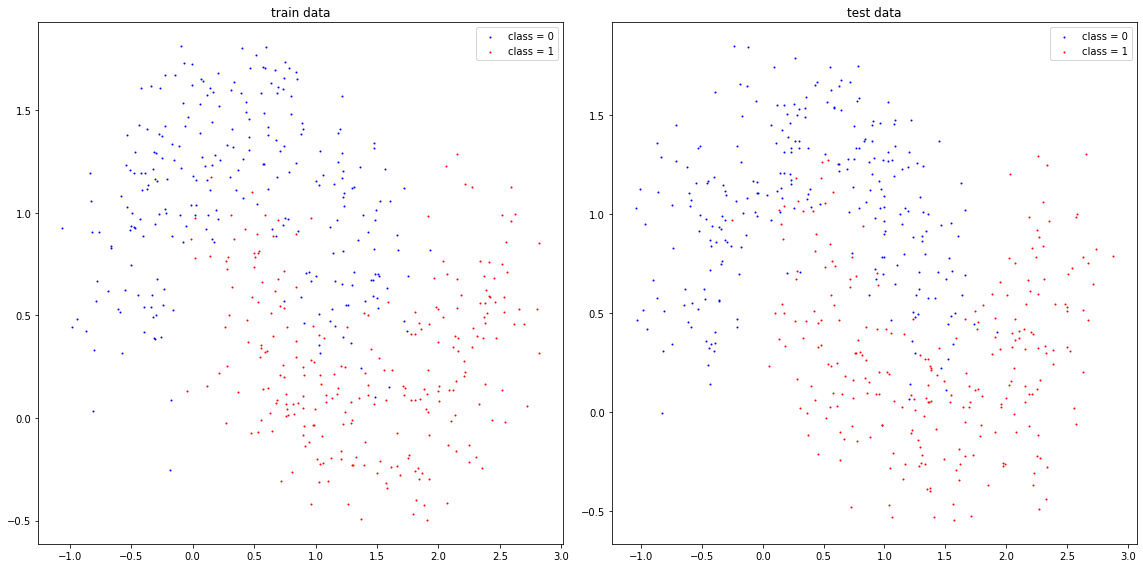

In [110]:
plot_data(data_train, data_test)

***

2. plot the values of the model parameters $\theta$ as curves over the gradient descent iterations using different colors

In [ ]:
plot_model_parameter(theta_iteration)

***

3. plot the training loss in red curve and the testing loss in blue curve over the gradient descent iterations

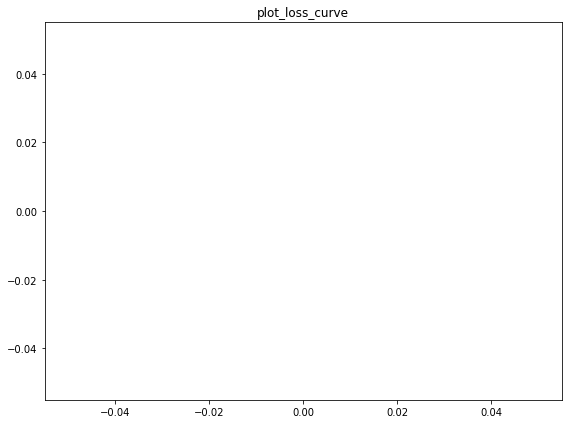

In [104]:
plot_loss_curve(loss_iteration_train, loss_iteration_test)

***

4. plot the training accuracy in red curve and the testing accuracy in blue curve over the gradient descent iterations

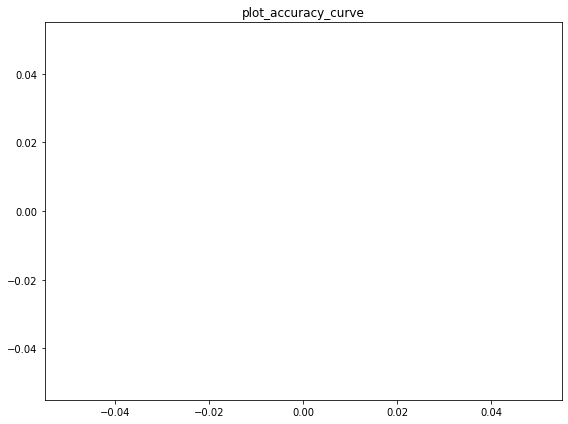

In [105]:
plot_accuracy_curve(accuracy_iteration_train, accuracy_iteration_test)

***

5. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the training data

In [ ]:
plot_classifier(data_train, theta_optimal)

***

6. plot the classifier using the prediction values in the color coding scheme ranges from blue (class 0) to red (class 1) with the testing data

In [ ]:
plot_classifier(data_test, theta_optimal)

***

7. print out the final training accuracy and the final testing accuracy in number with 5 decimal places (e.g. 0.98765)

In [65]:
print('accuract(train): {}'.format(accuracy_train))
print('accuracy(test) : {}'.format(accuracy_test))

accuract(train): nan
accuracy(test) : nan
